# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 6.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
66879,0.0024,0.1221,0.3003,0.0513,0.0684,0.2197,1.1572,1.0815,1.0522,0.3833,10,10,8,8
116003,0.0024,0.7764,0.5469,0.2026,0.0146,0.0952,1.0059,0.1758,1.2158,1.1401,8,8,2,2
444595,0.0024,0.2759,0.6177,0.0830,0.4053,0.7178,1.4819,2.8223,1.9580,0.6982,4,4,23,23
108982,0.0024,0.0635,0.0391,0.1050,0.0293,0.2490,0.4761,0.1904,0.0342,0.3516,10,10,1,1
291884,0.0049,0.3027,1.4233,0.6567,0.2539,0.4517,0.9399,0.7446,0.7373,0.5640,2,2,6,6


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453169 entries, 0 to 453168
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          453169 non-null  float64
 1   Emg2          453169 non-null  float64
 2   Emg3          453169 non-null  float64
 3   Emg4          453169 non-null  float64
 4   Emg5          453169 non-null  float64
 5   Emg6          453169 non-null  float64
 6   Emg7          453169 non-null  float64
 7   Emg8          453169 non-null  float64
 8   Emg9          453169 non-null  float64
 9   Emg10         453169 non-null  float64
 10  repetition    453169 non-null  int64  
 11  rerepetition  453169 non-null  int64  
 12  stimulus      453169 non-null  int64  
 13  restimulus    453169 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000,453169.000000
mean,0.005103,0.148389,0.138062,0.102310,0.048998,0.165430,0.587269,0.442196,0.203062,0.301173,3.266322,2.535246,5.786462,4.617968
std,0.010483,0.261329,0.298778,0.247929,0.108016,0.347019,0.805044,0.669024,0.474586,0.421003,3.489826,3.359291,6.599539,6.446301
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.007300,0.063500,0.092800,0.002400,0.041500,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.009800,0.004900,0.002400,0.002400,0.056200,0.322300,0.217300,0.004900,0.148900,2.000000,0.000000,3.000000,0.000000
75%,0.004900,0.192900,0.139200,0.092800,0.048800,0.170900,0.759300,0.468800,0.166000,0.385700,6.000000,5.000000,11.000000,9.000000
max,0.903300,2.976100,4.660600,4.099100,2.482900,4.668000,4.665500,4.668000,4.663100,4.421400,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     184003
8      16361
2      15525
7      15517
12     15513
4      15507
6      15497
9      15476
11     15470
5      15468
10     15443
1      15443
3      15441
14     10342
17     10337
13     10336
15     10295
16     10261
21      5173
18      5171
19      5171
23      5144
20      5138
22      5137
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.249766,-0.599679,-0.494885,-0.436914,-0.467507,-0.491105,-0.755043,-0.647202,-0.465283,-0.741571
1,-0.249766,-0.599679,-0.494885,-0.436914,-0.467507,-0.491105,-0.755043,-0.657453,-0.465283,-0.741571
2,-0.018409,-0.599679,-0.494885,-0.436914,-0.467507,-0.491105,-0.752111,-0.640321,-0.465283,-0.741571
3,-0.018409,-0.599679,-0.494885,-0.436914,-0.467507,-0.491105,-0.755043,-0.626700,-0.465283,-0.741571
4,-0.018409,-0.599679,-0.494885,-0.436914,-0.467507,-0.491105,-0.755043,-0.626700,-0.465283,-0.741571
...,...,...,...,...,...,...,...,...,...,...
378091,-0.249766,-0.175660,-0.264980,-0.217001,0.439790,0.080546,-0.179263,0.240682,0.263750,-0.053586
378092,-0.249766,-0.042883,-0.096551,-0.217001,0.334370,0.008417,-0.210820,0.216670,0.278184,-0.086454
378093,-0.249766,0.036350,0.094775,-0.217001,0.292030,-0.017959,-0.207888,0.196169,0.283127,-0.080864
378094,-0.249766,0.089533,0.202043,-0.226007,0.249689,-0.031147,-0.227948,0.151515,0.254061,-0.086454


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
75/75 [==============================] - 22s 62ms/step - loss: 1.4024 - accuracy: 0.6275 - val_loss: 0.9758 - val_accuracy: 0.7314
Epoch 2/100
75/75 [==============================] - 2s 26ms/step - loss: 0.8906 - accuracy: 0.7508 - val_loss: 0.7925 - val_accuracy: 0.7770
Epoch 3/100
75/75 [==============================] - 2s 26ms/step - loss: 0.7590 - accuracy: 0.7834 - val_loss: 0.6947 - val_accuracy: 0.8008
Epoch 4/100
75/75 [==============================] - 2s 27ms/step - loss: 0.6772 - accuracy: 0.8042 - val_loss: 0.6365 - val_accuracy: 0.8142
Epoch 5/100
75/75 [==============================] - 2s 27ms/step - loss: 0.6174 - accuracy: 0.8192 - val_loss: 0.5777 - val_accuracy: 0.8303
Epoch 6/100
75/75 [==============================] - 2s 29ms/step - loss: 0.5746 - accuracy: 0.8300 - val_loss: 0.5421 - val_accuracy: 0.8389
Epoch 7/100
75/75 [==============================] - 2s 29ms/step - loss: 0.5373 - accuracy: 0.8398 - val_loss: 0.5003 - val_accuracy: 0.8513
Epoch

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

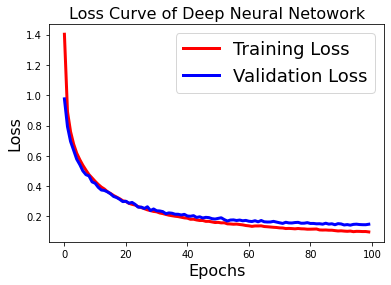

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

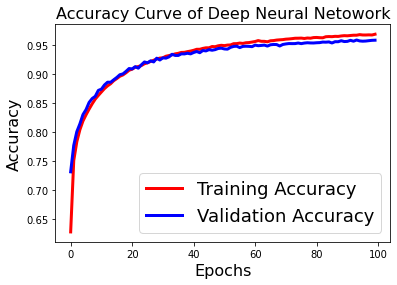

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 0, 16,  0, ..., 11, 12,  4], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

16

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 95.88600899233008


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     35440
           1       0.96      0.98      0.97      2416
           2       0.98      0.92      0.95      2012
           3       0.97      0.96      0.96      2302
           4       0.97      0.95      0.96      2120
           5       0.98      0.92      0.95      2055
           6       0.98      0.95      0.97      2214
           7       0.96      0.91      0.93      2326
           8       0.97      0.91      0.94      2403
           9       0.92      0.94      0.93      2255
          10       0.96      0.93      0.94      2516
          11       0.97      0.93      0.95      2458
          12       0.96      0.92      0.94      2411
          13       0.98      0.93      0.95      1404
          14       0.93      0.82      0.87      1637
          15       0.90      0.91      0.90      1448
          16       0.96      0.94      0.95      1536
 

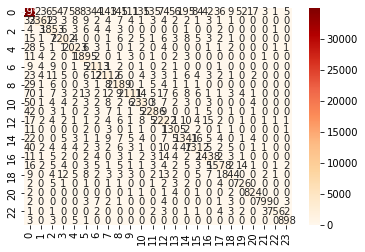

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.346548532134356
MSE: 3.9537688442211056
RMSE: 1.9884086210387204


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9590469225855722
Recall Score :  0.9588600899233007
f1_score :  0.9585775638343308
